In [300]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io, transform
import open3d as o3d
import h5py
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import open3d 
from skimage.measure import regionprops
from skimage import filters

In [362]:
from finetune_test.seed_everything import seed_everything

In [363]:
seed = 0
seed_everything(seed)
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"
def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2 ** 32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
g = torch.Generator()
g.manual_seed(seed)

def generator(seed):
    g = torch.Generator()
    g.manual_seed(seed)
    return g


In [449]:
# original saved file with DataParallel
state_dict = torch.load(os.path.join(mainpath,'model_001'))
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)
model.eval()

CNet(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (bn0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): ModuleList(
    (0): Linear(in_features=29440, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=1500, bias=True)
  )
)

In [450]:
phase = 'val'

In [451]:
input_image = np.genfromtxt(mainpath+'input_image_'+phase,delimiter=',')

In [452]:
inputs2 = torch.unsqueeze(torch.unsqueeze(torch.Tensor(input_image), axis=0), axis=0)

In [453]:
outputs2, latent2 = model(inputs2)

In [454]:
latent3 = np.genfromtxt(mainpath+'latent3_'+phase+'_001',delimiter=',')

In [455]:
latent3.shape

(32,)

In [456]:
latent4 = np.genfromtxt(mainpath+'latent4_'+phase+'_001',delimiter=',')

In [457]:
o4 = np.genfromtxt(mainpath+'o4_'+phase+'_001',delimiter=',')

In [458]:
o3 = np.genfromtxt(mainpath+'o3_'+phase+'_001',delimiter=',')

In [459]:
ot = np.genfromtxt(mainpath+'o_'+phase+'_001', delimiter = ',')

In [460]:
def delta(a,b):
    return(np.sum(np.abs(a-b)))

In [461]:
latent2 = latent2.detach().cpu().numpy()

In [462]:
latent3.shape

(32,)

In [463]:
latent4.shape

(18, 32)

In [464]:
delta(latent3,latent4[0])

2.0675361156463623e-06

In [465]:
delta(latent3,latent2)

1.218169927597046e-06

In [466]:
delta(latent4[0],latent2)

2.250075340270996e-06

In [467]:
delta(o3,o4[0])

6.81048259139061e-05

In [468]:
delta(5*o3,ot[0])

0.0003476366400718689

In [469]:
delta(5*o4[0],ot[0])

3.521237522363663e-05

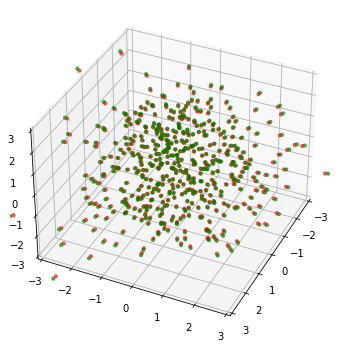

In [470]:
showpoints(ot[0].reshape(3,500),5.1*outputs2.detach().reshape(3,500))

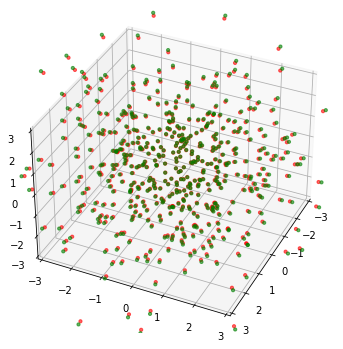

In [238]:
showpoints(ot[0].reshape(3,500),5.1*outputs2.detach().numpy().reshape(3,500))

In [221]:
o4 = np.genfromtxt(mainpath+'o4_'+phase+'_001',delimiter=',')

In [222]:
o3 = np.genfromtxt(mainpath+'o3_'+phase+'_001',delimiter=',')

In [186]:
o4.shape

(27, 1500)

# Check train

In [335]:
iscuda = True
seed = 0
torch.manual_seed(seed)
if iscuda:
    torch.cuda.manual_seed_all(seed)

In [471]:
hidden_dim = np.hstack((np.repeat(32, 1),1500))
chidden_dim = np.hstack((96,128,np.repeat(256, 3)))
kernel_sizes = np.hstack((7,np.repeat(3, 5)))
enim = 1
rescalef = 250
original_w = 1800
original_h = 1000
model = CNet(hidden_dim, chidden_dim, kernel_sizes,
            enim, rescalef,
            int(rescalef*original_w/original_h), True)

In [524]:
# original saved file with DataParallel
state_dict = torch.load(os.path.join(mainpath,'model_001'))
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)
model.eval()

CNet(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (bn0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): ModuleList(
    (0): Linear(in_features=29440, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=1500, bias=True)
  )
)

In [525]:
phase = 'train'

In [526]:
input_image = np.genfromtxt(mainpath+'input_image_'+phase,delimiter=',')

In [527]:
inputs2 = torch.unsqueeze(torch.unsqueeze(torch.Tensor(input_image), axis=0), axis=0)

In [528]:
outputs2, latent2 = model(inputs2)

In [529]:
latent3 = np.genfromtxt(mainpath+'latent3_'+phase+'_001',delimiter=',')

In [530]:
latent3.shape

(32,)

In [531]:
latent4 = np.genfromtxt(mainpath+'latent4_'+phase+'_001',delimiter=',')

In [532]:
o4 = np.genfromtxt(mainpath+'o4_'+phase+'_001',delimiter=',')

In [533]:
o3 = np.genfromtxt(mainpath+'o3_'+phase+'_001',delimiter=',')

In [534]:
ot = np.genfromtxt(mainpath+'o_'+phase+'_001', delimiter = ',')

In [535]:
def delta(a,b):
    return(np.sum(np.abs(a-b)))

In [536]:
latent2 = latent2.detach().cpu().numpy()

In [537]:
latent3.shape

(32,)

In [538]:
latent4.shape

(27, 32)

In [539]:
delta(latent3,latent4[0])

1.7452985048294067e-06

In [540]:
delta(latent4[0],latent2)

1.7173588275909424e-06

In [517]:
delta(latent3,latent2)

90.20145920850337

In [520]:
delta(latent4[0],latent2)

90.20145922526717

In [521]:
delta(o3,o4[0])

6.076926365494728e-05

In [522]:
delta(o3,outputs2.detach().numpy())

1903.4234213079326

In [523]:
delta(5*o3,ot[0])

11178.80516787665

In [448]:
delta(5*o4[0],ot[0])

11178.805132996291

In [424]:
ot[0].shape

(1500,)

In [497]:
delta(ot[0],5*outputs2.detach().numpy())

11178.805123646278

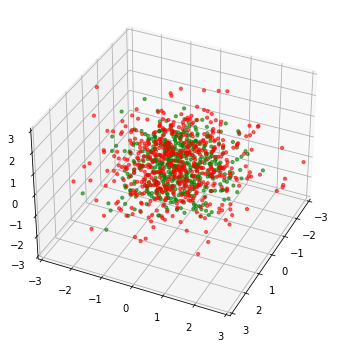

In [426]:
showpoints(ot[0].reshape(3,500),5*o3.reshape(3,500))

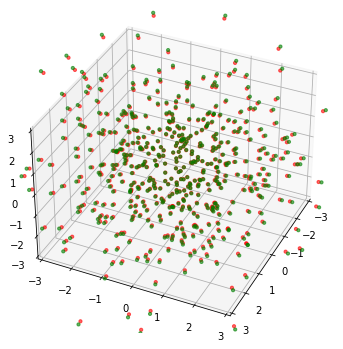

In [238]:
showpoints(ot[0].reshape(3,500),5.1*outputs2.detach().numpy().reshape(3,500))

In [189]:
np.sum(np.abs(o4[0]-o3))

1160.9618331952952

In [187]:
o3 = np.genfromtxt(mainpath+'o3_'+phase+'_001',delimiter=',')

In [225]:
ot.shape

(18, 1500)

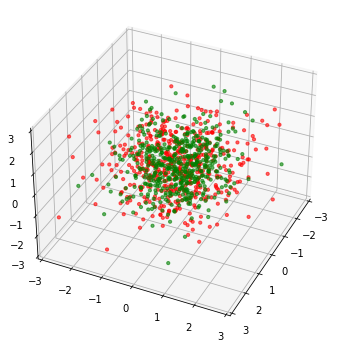

In [180]:
showpoints(ot[0].reshape(3,500),0.5*o3.reshape(3,500))

In [194]:
o3[0].shape

()

In [196]:
o3.shape

(1500,)

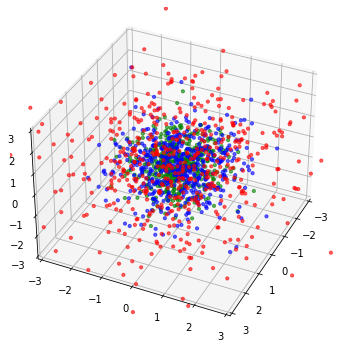

In [201]:
showpoints(o3.reshape(3,500),o4[0].reshape(3,500),0.2*ot[0].reshape(3,500))

In [5]:
input_image = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e057/054/input_image_train', delimiter=',')

In [6]:
input_image.shape

(250, 450)

In [ ]:
598csv9/1484742/1495190

In [15]:
not 51 % 50

False

In [79]:
localexp = '058/'

In [80]:
mainpath = 'C:/cherepashkin1/598test/plot_output/e057/'+localexp

In [81]:
exec(open(os.path.join(mainpath+'cnet.py')).read())

In [144]:
hidden_dim = np.hstack((np.repeat(32, 1),1500))
chidden_dim = np.hstack((96,128,np.repeat(256, 3)))
kernel_sizes = np.hstack((7,np.repeat(3, 5)))
enim = 1
rescalef = 250
original_w = 1800
original_h = 1000
model = CNet(hidden_dim, chidden_dim, kernel_sizes,
            enim, rescalef,
            int(rescalef*original_w/original_h), True)

In [146]:

# model.load_state_dict(torch.load(os.path.join(mainpath,'model')))
# model.eval()

In [87]:
curimg = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484722/1492634/rotation_000.tif'), dtype=np.single)

In [88]:
# img = np.squeeze(255-image[i])
img = 255-curimg
new_h, new_w = 550, 990
properties = regionprops(
    (img > filters.threshold_otsu(img)).astype(int), img)
cms = tuple(map(lambda x: int(x), properties[0].centroid))
tempa = (img[cms[0] - new_h//2: cms[0] + new_h//2,
         cms[1] - new_w//2: cms[1] + new_w//2]).astype(np.uint8)
padh = (new_h-tempa.shape[0])//2
padw = (new_w-tempa.shape[1])//2
tempb = np.pad(
    tempa, ((padh, new_h-tempa.shape[0]-padh),
            (padw, new_w-tempa.shape[1]-padw)),
    mode='constant', constant_values=0)
new_image = tempb

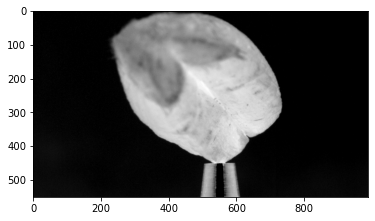

In [89]:
plt.imshow(new_image, cmap='gray')

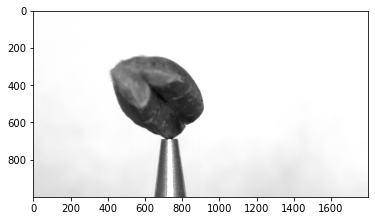

In [90]:
plt.imshow(curimg, cmap='gray')

In [161]:
input_image.shape

(250, 450)

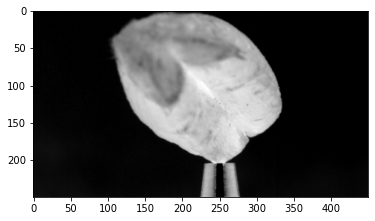

In [162]:
plt.imshow(input_image,cmap='gray')

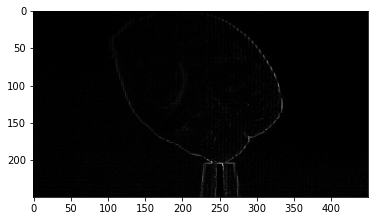

In [151]:
plt.imshow(np.abs(input_image-curimg2),cmap='gray')

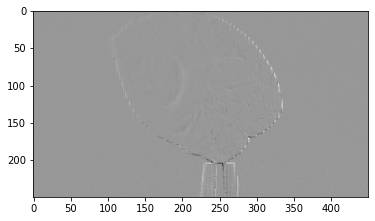

In [122]:
plt.imshow(input_image-curimg2,cmap='gray')

In [118]:
curimg2.shape

(250, 450)

In [119]:
np.sum(np.abs(input_image-curimg2))

0.06338409599564639

In [91]:
stand = (18.31589541, 39.63290785)
# new_image = 255 - new_image
new_image = (new_image - stand[0])/stand[1]

In [92]:
np.mean(new_image)

0.7123277415920201

In [93]:
np.std(new_image)

1.71410542794408

In [94]:
curimg2 = transform.resize(new_image,(250, 450))
inputs = torch.unsqueeze(torch.unsqueeze(torch.Tensor(curimg2), axis=0), axis=0)

In [175]:
np.sum(np.abs(ot[0]-5*o3))

10948.783522762358

In [171]:
o3.shape

(1500,)

In [166]:
latent2

tensor([[-0.7616,  0.5607, -0.4014, -0.7393,  0.5146, -0.0799,  0.5129,  0.3888,
          0.0550,  0.7626,  0.5153, -1.0577,  0.5105,  0.2832, -0.5644,  0.0147,
          1.0258,  0.9427,  0.4717,  0.8447, -0.8433,  0.7471,  0.4401,  0.6232,
          0.7111,  0.7594, -0.9043,  0.6967,  0.8631, -0.4691, -0.8160,  0.5129]],
       grad_fn=<AddmmBackward0>)

In [167]:
latent3

array([-2.72754002,  2.41237092, -1.67477584, -3.96747518,  3.97748733,
       -0.00595124,  1.85194254,  2.28757215,  0.73973227,  3.06049109,
        1.69449401, -5.19823647,  1.9467051 ,  1.36692166, -2.76668286,
       -0.31510186,  4.47785616,  4.52275133,  2.38365149,  3.79749918,
       -4.815557  ,  4.25545597,  1.80977464,  4.16114426,  2.41366982,
        2.71400928, -3.95193863,  3.94932485,  4.10504961, -1.63260734,
       -4.50196791,  2.05250931])

In [154]:
latent2

tensor([[-0.5684,  0.5959, -0.5167, -0.5867, -0.4697, -0.0024,  0.0285, -0.6690,
          0.3410, -0.3716, -0.5209,  0.4601, -0.0066,  0.6663, -0.3254, -0.0993,
         -0.4203, -0.0063, -0.5461, -0.4504,  0.5513, -0.6935,  0.6110,  0.6173,
         -0.3014, -0.5282,  0.6541, -0.6244,  0.3034, -0.6394,  0.4710, -0.1000]],
       grad_fn=<AddmmBackward0>)

In [125]:
latent2

tensor([[-0.7811, -0.7984, -0.5043,  0.9167,  0.5511,  0.5741, -1.1387,  0.6988,
         -0.0388,  0.8453,  0.7211, -0.6267,  1.0097,  0.9788,  0.0920,  0.7202,
         -0.1126,  0.7211, -0.2999,  1.0249, -1.1263,  0.2009,  1.2286, -0.5929,
         -1.0109,  0.5983,  0.8854, -0.9183,  0.9043,  1.0758, -0.1859, -0.3190]],
       grad_fn=<AddmmBackward0>)

In [56]:
latent

tensor([[ 1.3488,  0.5197, -0.7737, -0.6336,  0.6864, -0.6536,  0.4201, -0.5875,
         -0.8534, -1.0895, -0.7157,  0.5300, -0.5652,  0.8379, -0.6651, -0.6569,
         -0.6281, -0.3952,  0.6779, -0.8749,  0.3271,  1.0177,  0.5468, -1.0363,
          0.9409, -0.1248, -0.3078,  0.6705,  0.7350, -0.5877,  0.8525,  0.3764]],
       grad_fn=<AddmmBackward0>)

In [96]:
latent

tensor([[ 0.5488, -0.6865,  0.4326,  0.2183, -0.8891,  0.7236,  0.7305, -0.5320,
          0.1172,  0.7388,  0.6110,  0.8175,  0.8592,  0.7981, -0.7564, -0.4228,
          0.8226,  0.1889,  0.8719, -0.7674,  0.3265, -0.8552, -0.6520,  0.6904,
         -0.8465, -0.9000,  0.9199,  0.7932,  0.0470, -0.5497,  0.3318, -0.9089]],
       grad_fn=<AddmmBackward0>)

In [103]:
outputs_2 = np.genfromtxt(mainpath+'outputs_2_train_001_001', delimiter = ',')

In [70]:
ot.shape

(27, 1500)

In [71]:
outputs_2.shape

(3, 500)

In [ ]:
ot[0].reshape(3,500)

In [105]:
np.sum(np.abs(ot[0].reshape(3,500)-5*outputs_2))

0.00034870952367782593

In [25]:
def showpoints(p0,p1=None,p2=None,p3=None):
    vox2mm = 0.05
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 1, 0+1, projection='3d')
    # p0 = np.reshape(ot0,(3,500))
    # p1 = np.reshape(gt0,(3,500))
    #p3 - blue - model output from output folder
    #p2 - red - original pcd
    #p - green - model output from loaded model
    
    ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
    if p1 is not None:    
        ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
    if p2 is not None:    
        ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="b", alpha=0.6)
    # ax.scatter(p3[0,:],p3[1,:],p3[2,:], marker='o', s=10, c="b", alpha=0.6)
    # ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="r", alpha=0.6)
    # ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=35, azim=25)
    ax_lim = 60*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    plt.show()

In [26]:
prmat = np.genfromtxt('C:/circles/finetune_test/csv/prmat.csv', delimiter=',')
C = np.zeros([36,3,3])
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
for i in range(36):
    C[i,:,:] =\
    np.matmul(np.matmul(E,prmat[4*i:4*(i+1),:]),
        np.linalg.pinv(np.matmul(E,prmat[0:4,:])))
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598//1484722/1492634_Surface.ply').points)
# pcd = (pcd.transpose() - np.mean(pcd,axis=1)).transpose()
pcd = np.matmul(pcd,C[0])
# print(np.mean(pcd,axis=1).shape)
pcd = pcd- np.mean(pcd,axis=0)

print(np.mean(pcd,axis=0))
# print(np.mean(pcd,axis=1).shape)
pcd*=0.05
pcd = pcd.transpose()
pcd=pcd[:,::25]
# pcd = pcd.transpose()

[ 3.03822771e-12 -6.32020822e-13  1.13824992e-11]


In [55]:
C[1,:,:].shape

(3, 3)

In [58]:
ot[0].reshape(3,500).shape

(3, 500)

In [60]:
np.matmul(C[1,:,:],ot[0].reshape(3,500)).shape

(3, 500)

In [77]:
from os.path import join as jn

In [78]:
jn('12123','123123')

'12123\\123123'

In [107]:
outputs_2.shape

(3, 500)

In [109]:
ot[0].shape

(1500,)

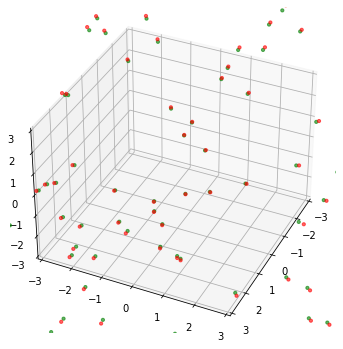

In [112]:
showpoints(5.1*outputs_2,ot[0].reshape(3,500))

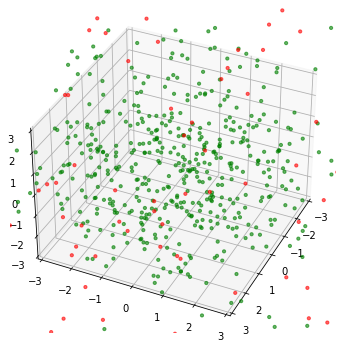

In [143]:
showpoints(ot[0].reshape(3,500),5*outputs2.detach().cpu().numpy().reshape(3,500))

In [142]:
C[0,:,:].transpose()

array([[ 1.00000000e+00, -8.53414248e-17, -3.81639165e-17],
       [-1.02260204e-16,  1.00000000e+00,  2.42861287e-17],
       [-1.97273505e-17,  2.90752252e-15,  1.00000000e+00]])

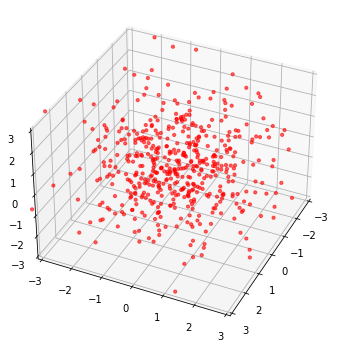

In [137]:
showpoints(0.1*ot[0].reshape(3,500))

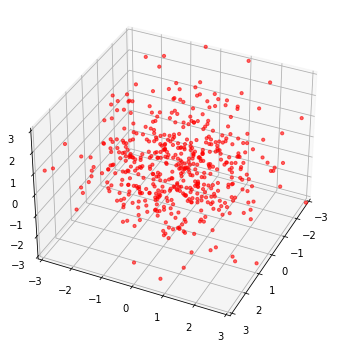

In [138]:
showpoints(3*outputs2.detach().cpu().numpy().reshape(3,500))

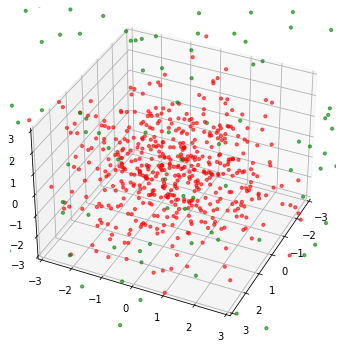

In [33]:
showpoints(outputs.detach().numpy().reshape(3,500)*5,np.matmul(C[0,:,:],ot[0].reshape(3,500)))

In [ ]:
for i in range(36):
    showpoints(outputs.detach().numpy().reshape(3,500)*5,np.matmul(C[i,:,:],ot[0].reshape(3,500)))

In [41]:
latent

tensor([[ 0.0432, -0.0549,  0.0147,  0.0644,  0.0498, -0.0468, -0.1278,  0.1517,
         -0.0512, -0.0364, -0.0605, -0.0464,  0.0701, -0.0315,  0.0597,  0.0418,
         -0.0861, -0.0242, -0.1441, -0.0291, -0.0015,  0.1057, -0.0362, -0.1883,
          0.0216, -0.0074,  0.2006,  0.1817,  0.0606, -0.0530, -0.0428,  0.0764]],
       grad_fn=<AddmmBackward0>)

In [219]:
outputs2, latent2 = model(inputs)

In [226]:
outputs3, latent3 = model(inputs)

In [215]:
latent

tensor([[ 0.0729, -0.0293, -0.0286,  0.0218,  0.0513,  0.0243,  0.0416,  0.0926,
          0.0605,  0.0117,  0.0473,  0.0436,  0.0212,  0.0146,  0.0419, -0.0700,
          0.0711,  0.0815,  0.0042, -0.0389,  0.0476,  0.0423,  0.0812,  0.0534,
         -0.0236, -0.0117,  0.0572, -0.0315, -0.0550,  0.0495, -0.0464,  0.0053]],
       grad_fn=<AddmmBackward0>)

In [220]:
latent2

tensor([[ 0.5687, -0.9010, -0.0684,  1.2606,  0.8643,  0.1708, -0.9362, -0.6165,
         -0.7572,  0.0451, -0.6847, -0.5847, -0.7284,  0.7999,  0.8710,  0.2531,
         -0.7736, -0.0422, -0.4891, -0.0951, -0.5047, -0.3108,  0.4816, -0.2543,
          0.2539,  0.2879,  0.1584, -1.0798,  0.0790,  0.9114,  0.1817,  0.2067]],
       grad_fn=<AddmmBackward0>)

In [227]:
latent3

tensor([[ 0.0192,  0.0408, -0.0347, -0.0113,  0.0215, -0.0337, -0.0113,  0.0106,
          0.0078, -0.0008,  0.0210,  0.0349, -0.0401,  0.0253,  0.0094, -0.0090,
          0.0134, -0.0185, -0.0410, -0.0113,  0.0413,  0.0279, -0.0107, -0.0526,
          0.0240, -0.0549,  0.0183,  0.0087, -0.0583,  0.0235, -0.0252, -0.0186]],
       grad_fn=<AddmmBackward0>)

In [134]:
a = np.zeros([3,500])

In [136]:
from numpy import linalg as LA

In [138]:
LA.norm(a,axis=0).shape

(500,)

In [97]:
rimg = torch.rand(550,990)

In [118]:
outputs, latent = model(inputs)

In [119]:
p = np.reshape(np.squeeze(outputs.detach().numpy()), (3,500))

In [105]:
p.shape

(3, 500)

In [126]:
p *= 100*0.05

In [51]:
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484742/1495190_Surface.ply').points)


In [108]:
p.shape

(3, 500)

In [127]:
p4 = np.matmul(p.transpose(),C[10])

In [109]:
pcd.shape

(25695, 3)

In [54]:
p1 = np.matmul(pcd,C[10])

In [58]:
p1*=0.05

In [60]:
p1 = p1.transpose()

In [62]:
p1.shape

(3, 25695)

In [67]:
np.mean(p1,axis=1).shape

(3,)

In [68]:
p1.shape

(3, 25695)

In [90]:
p2 = p1.transpose() - np.mean(p1,axis=1)

In [91]:
p2 = p2.transpose()

In [92]:
p2.shape

(3, 25695)

In [93]:
p2 = p2[:,::25]

In [262]:
p2.shape

(3, 1028)

In [129]:
p4 = p4.transpose()

In [233]:
outputs.shape

torch.Size([1, 1500])

In [244]:
p0 = outputs.detach().numpy().reshape(3,500).transpose()*0.05

In [245]:
p0.shape

(500, 3)

In [258]:
p1.shape

(3, 25695)

In [295]:
pcd.shape

(3, 1028)

In [296]:
pcd

array([[-0.65427518, -0.74213076, -0.67358278, ..., -3.52029223,
        -3.44306184, -3.53091742],
       [-2.6       , -2.71666666, -2.63333333, ..., -3.06666667,
        -2.93333333, -3.05      ],
       [ 2.27088614,  2.28924239,  2.28440547, ..., -1.24690221,
        -1.30097952, -1.28262327]])

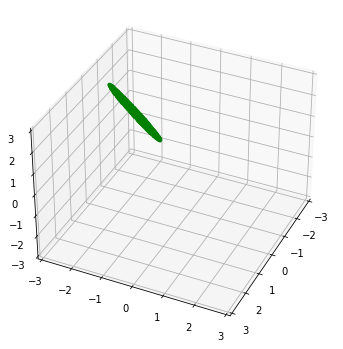

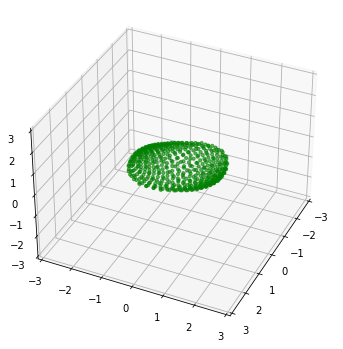

In [268]:
showpoints(outputs.detach().numpy().reshape(3,500)*5, pcd)

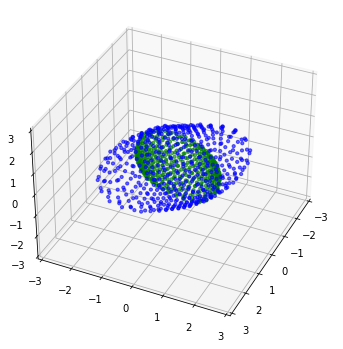

In [131]:
vox2mm = 0.05
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 0+1, projection='3d')
# p0 = np.reshape(ot0,(3,500))
# p1 = np.reshape(gt0,(3,500))
#p3 - blue - model output from output folder
#p2 - red - original pcd
#p - green - model output from loaded model
ax.scatter(p4[0,:],p4[1,:],p4[2,:], marker='o', s=10, c="g", alpha=0.6)
# ax.scatter(p3[0,:],p3[1,:],p3[2,:], marker='o', s=10, c="b", alpha=0.6)
# ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="r", alpha=0.6)
# ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.view_init(elev=35, azim=25)
ax_lim = 60*vox2mm
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
plt.show()

In [132]:
latent

tensor([[ 0.0729, -0.0293, -0.0286,  0.0218,  0.0513,  0.0243,  0.0416,  0.0926,
          0.0605,  0.0117,  0.0473,  0.0436,  0.0212,  0.0146,  0.0419, -0.0700,
          0.0711,  0.0815,  0.0042, -0.0389,  0.0476,  0.0423,  0.0812,  0.0534,
         -0.0236, -0.0117,  0.0572, -0.0315, -0.0550,  0.0495, -0.0464,  0.0053]],
       grad_fn=<AddmmBackward0>)

In [31]:
latent.shape

torch.Size([1, 32])

In [84]:
ot = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e054/041/o_train_085', delimiter = ',')

In [86]:
ov = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e054/041/o_val_085', delimiter = ',')

In [85]:
ot.shape

(1500,)

In [87]:
ov.shape

(4, 1500)

In [89]:
p3 = ot.reshape(3,500)

In [139]:
p3.shape

(3, 500)

In [142]:
p4.shape

(3, 500)

In [143]:

def showpoints(ax, el, az, p0, p1 = None):
    ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
    if p1 is not None:
        ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=el, azim=az)
    ax_lim = 60*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)

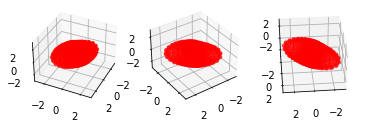

In [160]:
fig = plt.figure(figsize=(6,6))
el = np.repeat(35,3)
# az = np.arange(25,150,30)
az = np.arange(25,115,30)
# for j in range(3):
for i in range(el.shape[0]):
    ax = fig.add_subplot(3, el.shape[0], i+1,
        projection='3d')
    showpoints(ax, el[i], az[i], p3, p4)
#         for a in ax:
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.set_zticklabels([])

# plt.subplots_adjust(wspace=0, hspace=0)

In [178]:
az

array([25, 55, 85])